# Libraries Importation

In [299]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error

# Loading of Dataset

In [300]:
# read data
train = pd.read_csv('Housing_dataset_train.csv')
test = pd.read_csv('Housing_dataset_test.csv')
sample = pd.read_csv('Sample_submission.csv')

In [301]:
train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [302]:
test.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1


In [303]:
sample.head()

,ID
0,845
1,1924
2,10718
3,12076
4,12254


# Data Exploration

In [304]:
# Check size and shape of datasets
train.shape, test.shape, sample.shape

((14000, 7), (6000, 6), (6000, 1))

In [305]:
# Train to test sets ratio
(test.shape[0]) / (train.shape[0] + test.shape[0])

0.3

In [306]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [307]:
train.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [308]:
train.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

In [309]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(False, False)

C:\Users\RIDWAN\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


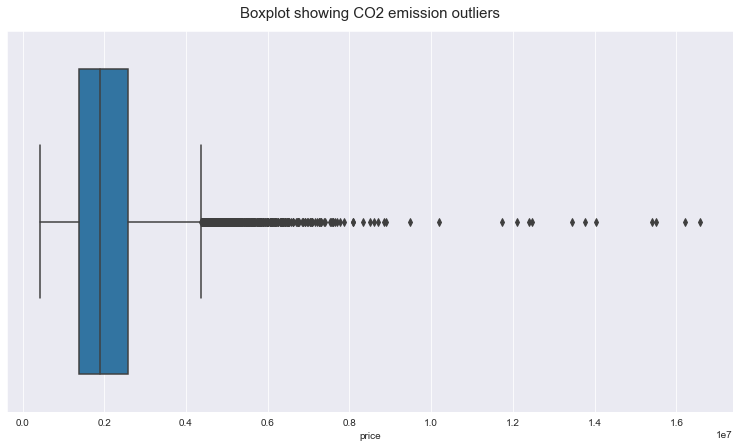

In [310]:

# Plotting boxplot for the price to check for outliers
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.boxplot(train.price)
plt.title('Boxplot showing CO2 emission outliers', y = 1.02, fontsize = 15)  
plt.show()


In [311]:
(train[['bedroom','bathroom', 'parking_space']] == 0).sum()

bedroom          0
bathroom         0
parking_space    0
dtype: int64

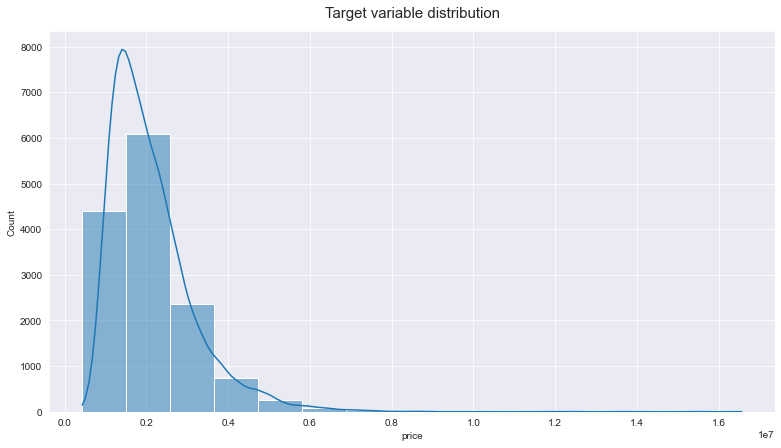

None

2.4518089350950483

In [312]:
# Price variable distribution
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.histplot(train.price, kde = True, bins = 15)
plt.title('Target variable distribution', y = 1.02, fontsize = 15)
display(plt.show(), train.price.skew())

C:\Users\RIDWAN\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


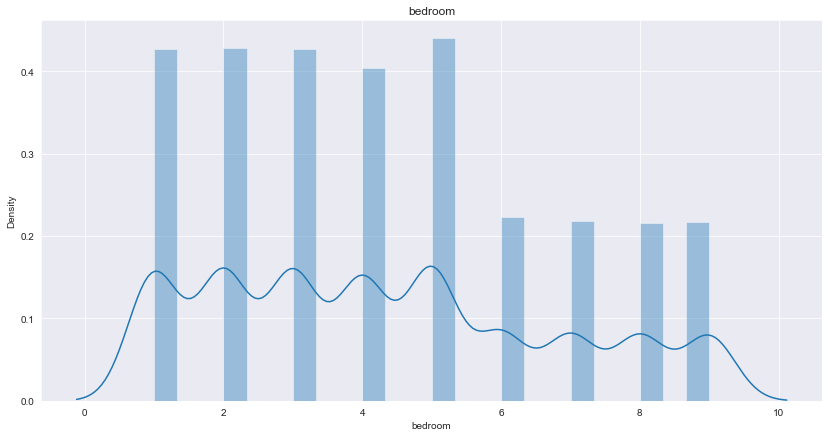

C:\Users\RIDWAN\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


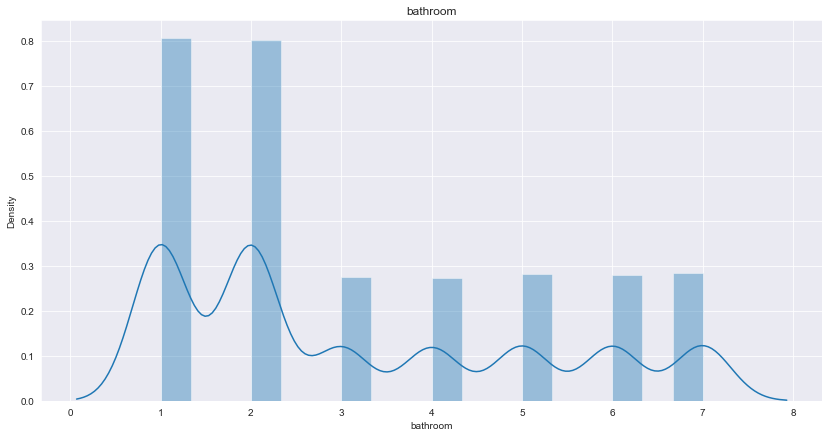

C:\Users\RIDWAN\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


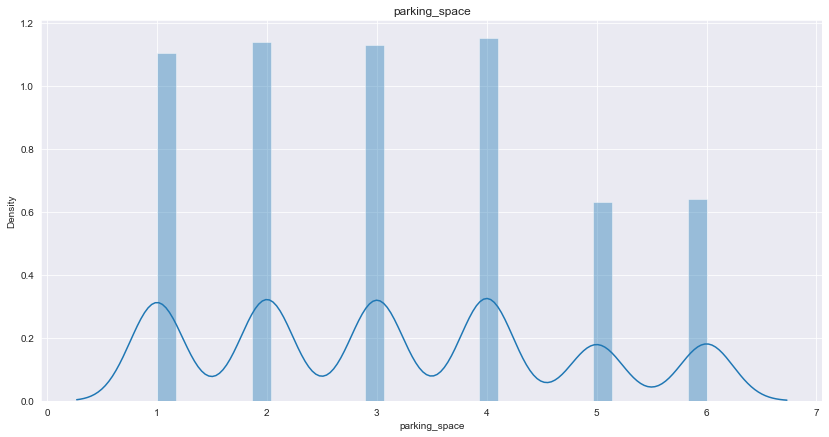

In [313]:
# Loop through each column in the column list for distribution plots
column_list = ['bedroom', 'bathroom', 'parking_space']
for column in column_list:
    # Create a distplot for the column
    plt.figure(figsize=(14, 7))
    sns.distplot(train[column])
    plt.title(column)
    plt.show()

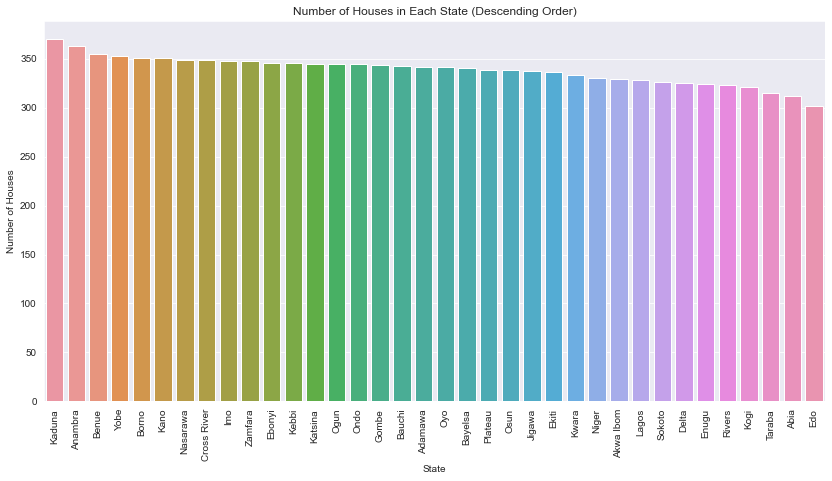

In [314]:
# Which state has the highest number of houses 
# Count the number of houses in each state
house_counts_by_state = train['loc'].value_counts().reset_index()
house_counts_by_state.columns = ['loc', 'count']
house_counts_by_state = house_counts_by_state.sort_values(by='count', ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x='loc', y='count', data=house_counts_by_state)
plt.title('Number of Houses in Each State (Descending Order)')
plt.xlabel('State')
plt.ylabel('Number of Houses')
plt.xticks(rotation=90)
plt.show()


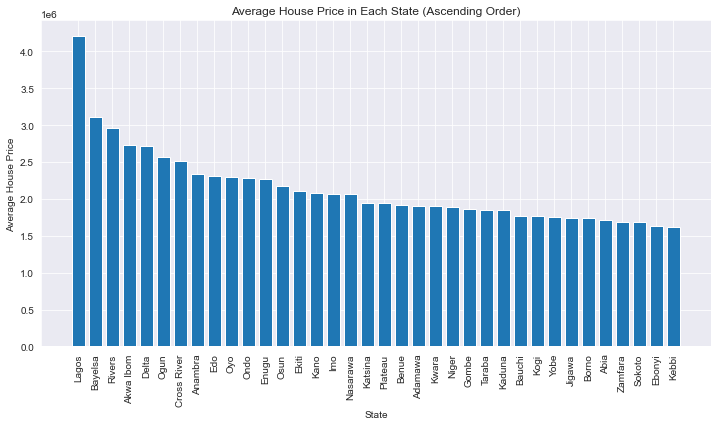

In [315]:
# What is the average house price in each state?
# Average House Price by State
average_price_by_state = train.groupby('loc')['price'].mean().reset_index()
average_price_by_state = average_price_by_state.sort_values(by='price', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(average_price_by_state['loc'], average_price_by_state['price'])
plt.xlabel('State')
plt.ylabel('Average House Price')
plt.title('Average House Price in Each State (Ascending Order)')
plt.xticks(rotation=90)
plt.show()


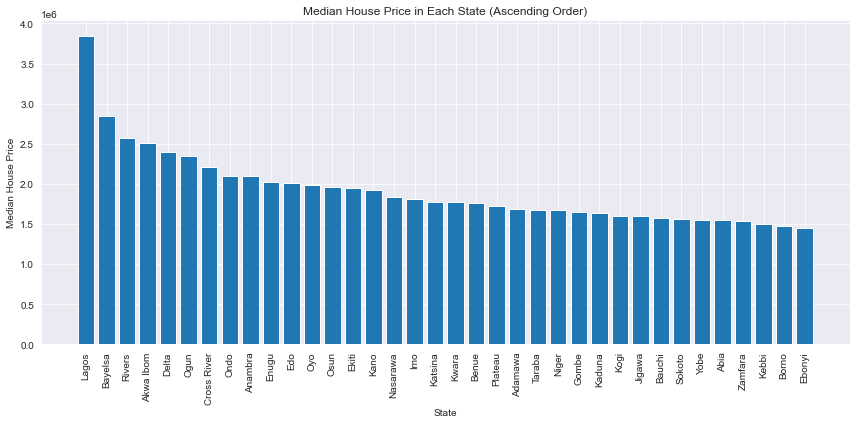

In [316]:
# Which state has the highest median house price?
median_price_by_state = train.groupby('loc')['price'].median().reset_index()
median_price_by_state = median_price_by_state.sort_values(by='price', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(median_price_by_state['loc'], median_price_by_state['price'])
plt.xlabel('State')
plt.ylabel('Median House Price')
plt.title('Median House Price in Each State (Ascending Order)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

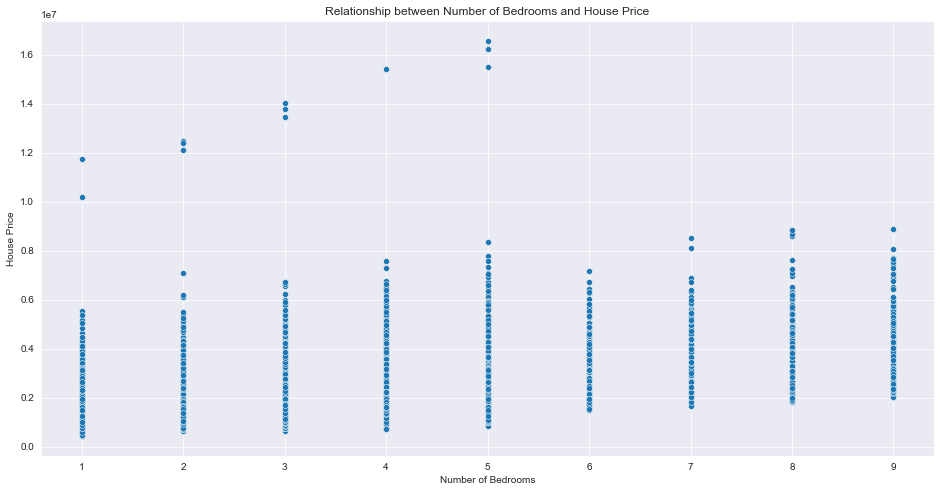

In [317]:
# scatter plot to visualize the relationship between 'bedroom' and 'price'
plt.figure(figsize=(16,8))
sns.scatterplot(x='bedroom', y='price', data=train)
plt.xlabel('Number of Bedrooms')
plt.ylabel('House Price')
plt.title('Relationship between Number of Bedrooms and House Price')
plt.show()

Text(0.5, 1.0, 'Average Number of Bathrooms by House Type')

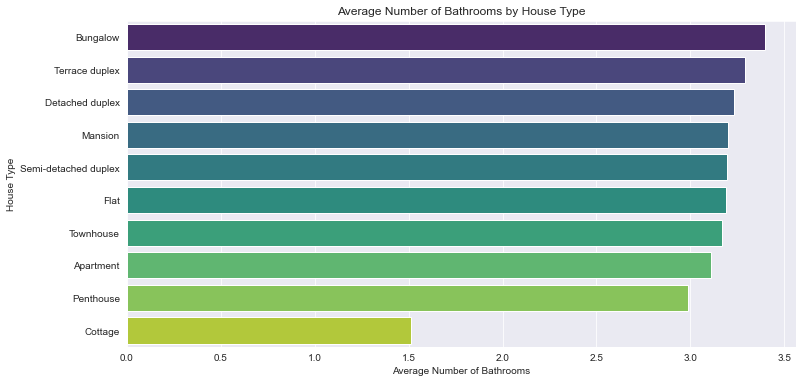

In [318]:
# Calculate the average number of bathrooms for each house type
average_bathrooms_by_type = train.groupby('title')['bathroom'].mean().reset_index()

# Sort the data by average number of bathrooms in descending order
average_bathrooms_by_type = average_bathrooms_by_type.sort_values(by='bathroom', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='bathroom', y='title', data=average_bathrooms_by_type, palette='viridis')
plt.xlabel('Average Number of Bathrooms')
plt.ylabel('House Type')
plt.title('Average Number of Bathrooms by House Type')

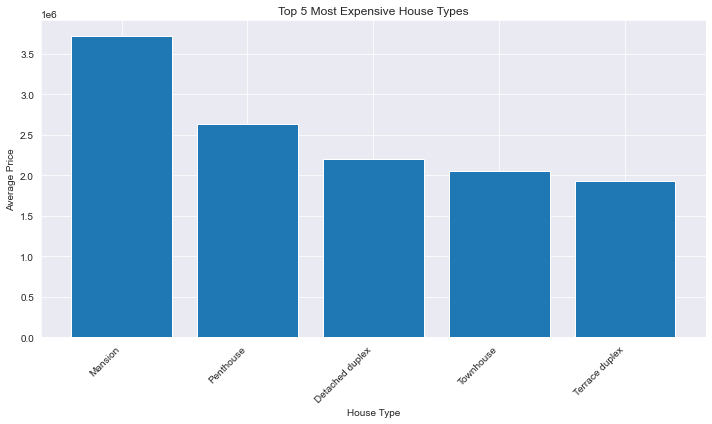

In [319]:
# Group by 'title' and calculate the average price for each house type
average_price_by_house_type = train.groupby('title')['price'].mean().reset_index()

# Sort the house types based on average price in descending order
top_5_expensive_house_types = average_price_by_house_type.sort_values(by='price', ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_5_expensive_house_types['title'], top_5_expensive_house_types['price'])
plt.xlabel('House Type')
plt.ylabel('Average Price')
plt.title('Top 5 Most Expensive House Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

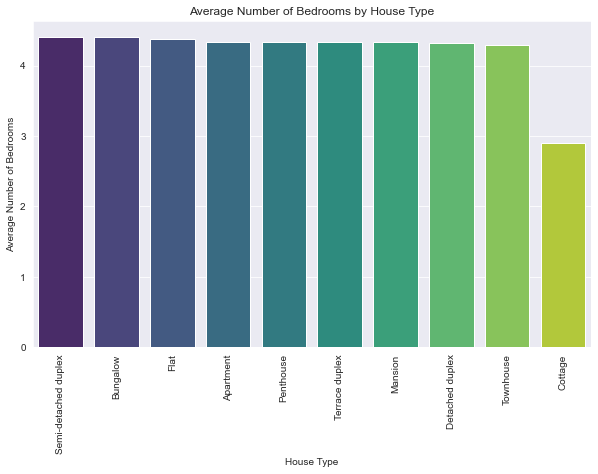

In [320]:
# Calculate the average number of bedrooms for each house type
average_bedrooms_by_type = train.groupby('title')['bedroom'].mean().reset_index()

# Sort the data by average number of bedrooms in descending order
average_bedrooms_by_type = average_bedrooms_by_type.sort_values(by='bedroom', ascending=False)

# Create a bar plot to visualize average number of bedrooms by house type
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='bedroom', data=average_bedrooms_by_type, palette='viridis')
plt.xlabel('House Type')
plt.ylabel('Average Number of Bedrooms')
plt.title('Average Number of Bedrooms by House Type')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Data Cleaning and Preprocessing

In [321]:
# Drop rows with missing values in 'loc' and 'title' columns
train = train.dropna(subset=['loc', 'title'])

'''
# Filling missing values for categorical columns with mode
categorical_columns = ['loc', 'title']
for col in categorical_columns:
    train[col].fillna(train[col].mode()[0], inplace=True)
'''

# Filling missing values for positively skewed numeric columns with median
skewed_numeric_columns = ['bedroom', 'bathroom', 'parking_space']
for col in skewed_numeric_columns:
    if train[col].skew() > 0:  # Check if the column is positively skewed
        train[col].fillna(train[col].median(), inplace=True)
    else:
        train[col].fillna(train[col].mean(), inplace=True)  # For other columns, use the mean


In [322]:
train.shape

(10531, 7)

In [323]:

# Calculate the 5th and 95th percentiles of the 'price' column
price_lower_bound = train['price'].quantile(0.05)
price_upper_bound = train['price'].quantile(0.95)

# Apply Winsorization to cap extreme values at the 5th and 95th percentiles
train['price'] = np.clip(train['price'], price_lower_bound, price_upper_bound)



C:\Users\RIDWAN\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


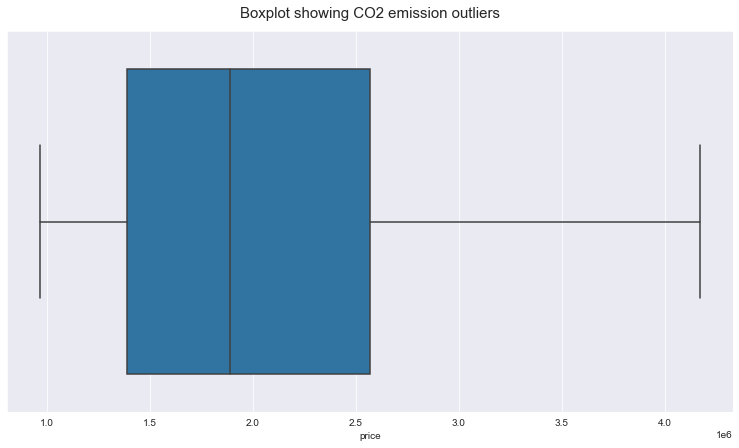

In [324]:
# Plotting boxplot for the price to check for outliers
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.boxplot(train.price)
plt.title('Boxplot showing CO2 emission outliers', y = 1.02, fontsize = 15)  
plt.show()

In [325]:
train.columns

Index(['ID', 'loc', 'title', 'bedroom', 'bathroom', 'parking_space', 'price'], dtype='object')

In [326]:
train['loc'].unique()

array(['Katsina', 'Ondo', 'Anambra', 'Kogi', 'Borno', 'Kwara', 'Osun',
       'Kaduna', 'Ogun', 'Bayelsa', 'Abia', 'Rivers', 'Taraba', 'Ebonyi',
       'Kebbi', 'Enugu', 'Edo', 'Nasarawa', 'Kano', 'Delta', 'Yobe',
       'Benue', 'Bauchi', 'Cross River', 'Niger', 'Adamawa', 'Plateau',
       'Imo', 'Oyo', 'Zamfara', 'Sokoto', 'Jigawa', 'Gombe', 'Lagos',
       'Akwa Ibom', 'Ekiti'], dtype=object)

In [327]:
train.title.unique()

array(['Semi-detached duplex', 'Apartment', 'Detached duplex',
       'Terrace duplex', 'Mansion', 'Bungalow', 'Penthouse', 'Townhouse',
       'Flat', 'Cottage'], dtype=object)

In [328]:
# convert the 'bedroom', bathroom, parking_space to int
train["bedroom"] = train["bedroom"].astype(int)
train["bathroom"] = train["bathroom"].astype(int)
train["parking_space"] = train["parking_space"].astype(int)


test["bedroom"] = test["bedroom"].astype(int)
test["bathroom"] = test["bathroom"].astype(int)
test["parking_space"] = test["parking_space"].astype(int)
     

In [329]:
def create_features(df):
    # Create 'total_rooms' feature by adding 'bedroom' and 'bathroom' columns
    df['total_rooms'] = df['bedroom'] + df['bathroom']

    # Create 'bedroom_bathroom_ratio' feature based on the condition
    df['bedroom_bathroom_ratio'] = np.where(df['bathroom'] > df['bedroom'], 1,
                                            np.where(df['bathroom'] < df['bedroom'], 2, 3))
    # 1 = less rooms, 2 = more rooms, 3 = equal rooms

    # Create 'bathroom_type' feature based on the condition
    df['bathroom_type'] = np.where(df['bathroom'] == 1, 1,
                                   np.where(df['bathroom'] == df['bedroom'], 2, 3))
    # 1 = single, 2 = master, 3 = shared

    # Define the bins and labels for the bedroom groups
    bins = [0, 2, 4, np.inf]
    labels = ['1', '2', '3']  # 1 = 0-2 bedrooms, 2 = 3-4 bedrooms, 3 = 5+ bedrooms

    # Create 'bedroom_group' feature, calculate 'total_amenities', and drop the original 'bedroom' column
    df['bedroom_group'] = pd.cut(df['bedroom'], bins=bins, labels=labels, right=False).astype(float)

    return df

In [330]:
train = create_features(train)
test = create_features(test)

In [331]:
# Define the mapping of states to regions
state_to_region = {
    'Katsina': 'North-west',
    'Ondo': 'South-west',
    'Ekiti': 'South-west',
    'Anambra': 'South-east',
    'Kogi': 'North-central',
    'Borno': 'North-east',
    'Kwara': 'North-central',
    'Osun': 'South-west',
    'Kaduna': 'North-west',
    'Ogun': 'South-west',
    'Bayelsa': 'South-south',
    'Abia': 'South-east',
    'Rivers': 'South-south',
    'Taraba': 'North-east',
    'Ebonyi': 'South-east',
    'Kebbi': 'North-west',
    'Enugu': 'South-east',
    'Edo': 'South-south',
    'Nasarawa': 'North-central',
    'Delta': 'South-south',
    'Kano': 'North-west',
    'Yobe': 'North-east',
    'Benue': 'North-central',
    'Bauchi': 'North-east',
    'Cross River': 'South-south',
    'Niger': 'North-central',
    'Adamawa': 'North-east',
    'Plateau': 'North-central',
    'Imo': 'South-east',
    'Oyo': 'South-west',
    'Zamfara': 'North-west',
    'Sokoto': 'North-west',
    'Jigawa': 'North-west',
    'Gombe': 'North-east',
    'Akwa Ibom': 'South-south',
    'Lagos': 'South-west'
}

# Create a new column 'region' by mapping 'loc' column to regions using the state_to_region mapping
train['region'] = train['loc'].map(state_to_region)
test['region'] = test['loc'].map(state_to_region)

In [332]:
train.region.nunique()

6

In [333]:
# Calculate the mean price for each house type
house_type_mean_price = train.groupby('title')['price'].mean().sort_values(ascending=False)

# Create a dictionary to map each house type to its rank based on mean price
house_type_rank = {house_type: rank for rank, house_type in enumerate(house_type_mean_price.index, 1)}
house_type_rank

{'Mansion': 1,
 'Penthouse': 2,
 'Detached duplex': 3,
 'Townhouse': 4,
 'Terrace duplex': 5,
 'Semi-detached duplex': 6,
 'Bungalow': 7,
 'Flat': 8,
 'Apartment': 9,
 'Cottage': 10}

In [334]:
# Convert the 'title' column to a categorical data type using the mapping
train['title'] = train['title'].map(house_type_rank)
test['title'] = test['title'].map(house_type_rank)

In [335]:
'''
# Perform one-hot encoding using get_dummies
train = pd.get_dummies(train, columns=['loc'], drop_first=True)
test = pd.get_dummies(test, columns=['loc'], drop_first=True)

train = pd.get_dummies(train, columns=['region'], drop_first=True)
test = pd.get_dummies(test, columns=['region'], drop_first=True)
'''

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'loc' and 'region' columns in the train and test DataFrames
train['loc'] = label_encoder.fit_transform(train['loc'])
test['loc'] = label_encoder.transform(test['loc'])

train['region'] = label_encoder.fit_transform(train['region'])
test['region'] = label_encoder.transform(test['region'])



# Model Development and Evaluation

In [336]:
X = train.drop(['ID','price'], axis=1)
y = train['price']

test.drop(columns=["ID"], inplace=True)

In [337]:
X_train,X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

In [338]:
# Initialize the regression models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'CatBoost': CatBoostRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
}


# Train and evaluate each model
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append((name, rmse))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'RMSE'])

# Sort by RMSE in ascending order
results_df = results_df.sort_values(by='RMSE', ascending=True)

# Print the best model and its RMSE
print("Best Model:")
print(results_df.head(1))

Learning rate set to 0.046056
0:	learn: 854138.0457312	total: 2.72ms	remaining: 2.71s
1:	learn: 829067.3213577	total: 5ms	remaining: 2.5s
2:	learn: 806661.4315361	total: 7.42ms	remaining: 2.47s
3:	learn: 783830.4443377	total: 9.68ms	remaining: 2.41s
4:	learn: 761827.3806253	total: 11.9ms	remaining: 2.37s
5:	learn: 743412.4485418	total: 14.5ms	remaining: 2.4s
6:	learn: 723508.3898614	total: 17.1ms	remaining: 2.42s
7:	learn: 706733.1692217	total: 19.4ms	remaining: 2.41s
8:	learn: 689609.3467845	total: 21.6ms	remaining: 2.38s
9:	learn: 673431.7602571	total: 23.9ms	remaining: 2.36s
10:	learn: 657192.0201793	total: 26.2ms	remaining: 2.36s
11:	learn: 641500.0197711	total: 28.2ms	remaining: 2.33s
12:	learn: 627804.5888088	total: 30.5ms	remaining: 2.31s
13:	learn: 614164.9700162	total: 32.4ms	remaining: 2.28s
14:	learn: 600404.3875357	total: 34.6ms	remaining: 2.27s
15:	learn: 587568.3975338	total: 36.7ms	remaining: 2.26s
16:	learn: 575351.4680170	total: 39.1ms	remaining: 2.26s
17:	learn: 56524

216:	learn: 284495.9995820	total: 377ms	remaining: 1.36s
217:	learn: 284212.8312442	total: 378ms	remaining: 1.36s
218:	learn: 283818.0504761	total: 380ms	remaining: 1.35s
219:	learn: 283554.4178416	total: 381ms	remaining: 1.35s
220:	learn: 283346.7261800	total: 382ms	remaining: 1.35s
221:	learn: 282996.0001333	total: 383ms	remaining: 1.34s
222:	learn: 282815.6929680	total: 384ms	remaining: 1.34s
223:	learn: 282486.3465566	total: 386ms	remaining: 1.34s
224:	learn: 281908.1160823	total: 387ms	remaining: 1.33s
225:	learn: 281749.8245730	total: 388ms	remaining: 1.33s
226:	learn: 281176.8174516	total: 389ms	remaining: 1.33s
227:	learn: 280874.1645519	total: 391ms	remaining: 1.32s
228:	learn: 280621.8503377	total: 392ms	remaining: 1.32s
229:	learn: 280321.7116896	total: 393ms	remaining: 1.31s
230:	learn: 280178.1796133	total: 394ms	remaining: 1.31s
231:	learn: 279832.9869211	total: 395ms	remaining: 1.31s
232:	learn: 279645.7283650	total: 397ms	remaining: 1.31s
233:	learn: 279149.4426748	tota

451:	learn: 234480.0537268	total: 705ms	remaining: 855ms
452:	learn: 234257.1645701	total: 706ms	remaining: 853ms
453:	learn: 233995.1711859	total: 708ms	remaining: 851ms
454:	learn: 233750.0289747	total: 709ms	remaining: 849ms
455:	learn: 233632.1596624	total: 710ms	remaining: 847ms
456:	learn: 233542.8400519	total: 711ms	remaining: 845ms
457:	learn: 233425.4678031	total: 713ms	remaining: 843ms
458:	learn: 233303.4417388	total: 714ms	remaining: 841ms
459:	learn: 233179.4229646	total: 715ms	remaining: 839ms
460:	learn: 233097.3819100	total: 716ms	remaining: 837ms
461:	learn: 232960.8957338	total: 718ms	remaining: 836ms
462:	learn: 232878.5601125	total: 719ms	remaining: 834ms
463:	learn: 232764.2614935	total: 720ms	remaining: 832ms
464:	learn: 232672.8931269	total: 721ms	remaining: 830ms
465:	learn: 232417.0869611	total: 723ms	remaining: 828ms
466:	learn: 232174.3131826	total: 724ms	remaining: 826ms
467:	learn: 232067.4439321	total: 725ms	remaining: 824ms
468:	learn: 231819.4268606	tota

681:	learn: 203944.8082608	total: 1.04s	remaining: 485ms
682:	learn: 203827.2464830	total: 1.04s	remaining: 484ms
683:	learn: 203741.1015718	total: 1.04s	remaining: 483ms
684:	learn: 203707.7905661	total: 1.05s	remaining: 482ms
685:	learn: 203672.5921635	total: 1.05s	remaining: 481ms
686:	learn: 203542.7594958	total: 1.05s	remaining: 479ms
687:	learn: 203420.9624655	total: 1.05s	remaining: 478ms
688:	learn: 203263.6995794	total: 1.06s	remaining: 477ms
689:	learn: 203005.2925064	total: 1.06s	remaining: 476ms
690:	learn: 202835.7677987	total: 1.06s	remaining: 475ms
691:	learn: 202734.0355763	total: 1.06s	remaining: 474ms
692:	learn: 202631.4462085	total: 1.07s	remaining: 473ms
693:	learn: 202561.1673257	total: 1.07s	remaining: 471ms
694:	learn: 202453.8237011	total: 1.07s	remaining: 471ms
695:	learn: 202333.6272531	total: 1.07s	remaining: 470ms
696:	learn: 202269.8384107	total: 1.08s	remaining: 468ms
697:	learn: 202138.3795806	total: 1.08s	remaining: 467ms
698:	learn: 202014.3347922	tota

836:	learn: 188203.1390480	total: 1.44s	remaining: 280ms
837:	learn: 188095.4466642	total: 1.44s	remaining: 279ms
838:	learn: 188032.9122810	total: 1.44s	remaining: 277ms
839:	learn: 187914.9880364	total: 1.45s	remaining: 276ms
840:	learn: 187852.7204375	total: 1.45s	remaining: 274ms
841:	learn: 187784.3363819	total: 1.45s	remaining: 272ms
842:	learn: 187721.7585129	total: 1.45s	remaining: 271ms
843:	learn: 187622.2924151	total: 1.46s	remaining: 269ms
844:	learn: 187520.6220858	total: 1.46s	remaining: 268ms
845:	learn: 187386.5552475	total: 1.46s	remaining: 266ms
846:	learn: 187329.4898757	total: 1.46s	remaining: 265ms
847:	learn: 187288.1346226	total: 1.47s	remaining: 263ms
848:	learn: 187181.2563385	total: 1.47s	remaining: 261ms
849:	learn: 187123.0878962	total: 1.47s	remaining: 260ms
850:	learn: 187038.2444456	total: 1.47s	remaining: 258ms
851:	learn: 186978.2148862	total: 1.48s	remaining: 257ms
852:	learn: 186891.9948511	total: 1.48s	remaining: 255ms
853:	learn: 186827.7916557	tota

Best Model:
      Model           RMSE
9  LightGBM  344079.208792


In [339]:
results_df

,Model,RMSE
9,LightGBM,344079.208792
2,Gradient Boosting,344681.838720
7,CatBoost,350057.434833
8,XGBoost,389057.069019
1,Random Forest,390573.197571
5,K-Nearest Neighbors,454481.636165
11,Ridge,500397.978109
0,Linear Regression,500399.192827
10,Lasso,500399.222793
12,ElasticNet,503412.397762


In [340]:

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150], # Number of boosting stages to be run
    'learning_rate': [0.05, 0.1, 0.2], # Shrinkage parameter to prevent overfitting
    'max_depth': [3, 4, 5], # Maximum depth of the individual trees
}

# Perform KFold cross-validation for hyperparameter tuning
kf = KFold(n_splits=5, shuffle=True, random_state=42)
best_params = None
best_rmse = float('inf')

for n_estimators in param_grid['n_estimators']:
    for learning_rate in param_grid['learning_rate']:
        for max_depth in param_grid['max_depth']:
            rmses = []
            for train_idx, val_idx in kf.split(X):
                X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
                y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

                catboost_model = CatBoostRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=42)
                catboost_model.fit(X_train, y_train, verbose=False)
                y_pred = catboost_model.predict(X_val)
                rmse = mean_squared_error(y_val, y_pred, squared=False)
                rmses.append(rmse)

            mean_rmse = np.mean(rmses)
            if mean_rmse < best_rmse:
                best_rmse = mean_rmse
                best_params = {
                    'n_estimators': n_estimators,
                    'learning_rate': learning_rate,
                    'max_depth': max_depth
                }

# Initialize the best CatBoost Regressor with the best hyperparameters
best_catboost_model = CatBoostRegressor(**best_params, random_state=42)

# Train the model on the full training data
best_catboost_model.fit(X, y, verbose=False)

# Predict on the test set
y_pred = best_catboost_model.predict(X_test)

# Calculate and print RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error for CatBoost Regressor = {rmse:.2f}")


Root Mean Squared Error for CatBoost Regressor = 305272.42


In [341]:

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages to be run
    'learning_rate': [0.05, 0.1, 0.2],  # Shrinkage parameter to prevent overfitting
    'max_depth': [3, 4, 5],  # Maximum depth of the individual trees
}

# Perform KFold cross-validation for hyperparameter tuning
kf = KFold(n_splits=5, shuffle=True, random_state=42)
best_params = None
best_rmse = float('inf')

for n_estimators in param_grid['n_estimators']:
    for learning_rate in param_grid['learning_rate']:
        for max_depth in param_grid['max_depth']:
            rmses = []
            for train_idx, val_idx in kf.split(X):
                X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
                y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

                lgbm_model = LGBMRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=42)
                lgbm_model.fit(X_train, y_train)
                y_pred = lgbm_model.predict(X_val)
                rmse = mean_squared_error(y_val, y_pred, squared=False)
                rmses.append(rmse)

            mean_rmse = np.mean(rmses)
            if mean_rmse < best_rmse:
                best_rmse = mean_rmse
                best_params = {
                    'n_estimators': n_estimators,
                    'learning_rate': learning_rate,
                    'max_depth': max_depth
                }

# Initialize the best LGBM Regressor with the best hyperparameters
best_lgbm_model = LGBMRegressor(**best_params, random_state=42)

# Train the model on the full training data
best_lgbm_model.fit(X, y)

# Predict on the test set
y_pred = best_lgbm_model.predict(X_test)

# Calculate and print RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error for LGBM Regressor = {rmse:.2f}")

Root Mean Squared Error for LGBM Regressor = 310037.72


In [342]:
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages to be run
    'learning_rate': [0.05, 0.1, 0.2],  # Shrinkage parameter to prevent overfitting
    'max_depth': [3, 4, 5],  # Maximum depth of the individual trees
}

# Perform KFold cross-validation for hyperparameter tuning
kf = KFold(n_splits=5, shuffle=True, random_state=42)
best_params = None
best_rmse = float('inf')

for n_estimators in param_grid['n_estimators']:
    for learning_rate in param_grid['learning_rate']:
        for max_depth in param_grid['max_depth']:
            rmses = []
            for train_idx, val_idx in kf.split(X):
                X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
                y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

                gb_model = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=42)
                gb_model.fit(X_train, y_train)
                y_pred = gb_model.predict(X_val)
                rmse = mean_squared_error(y_val, y_pred, squared=False)
                rmses.append(rmse)

            mean_rmse = np.mean(rmses)
            if mean_rmse < best_rmse:
                best_rmse = mean_rmse
                best_params = {
                    'n_estimators': n_estimators,
                    'learning_rate': learning_rate,
                    'max_depth': max_depth
                }

# Initialize the best Gradient Boosting Regressor with the best hyperparameters
best_gb_model = GradientBoostingRegressor(**best_params, random_state=42)

# Train the model on the full training data
best_gb_model.fit(X, y)

# Predict on the test set
y_pred = best_gb_model.predict(X_test)

# Calculate and print RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error for Gradient Boosting Regressor = {rmse:.2f}")

Root Mean Squared Error for Gradient Boosting Regressor = 302345.52


Feature ranking (in ascending order):
1. Feature 'title' with importance 37.2329
2. Feature 'bedroom' with importance 20.2658
3. Feature 'region' with importance 17.6535
4. Feature 'loc' with importance 15.0530
5. Feature 'total_rooms' with importance 7.6302
6. Feature 'bedroom_group' with importance 1.1952
7. Feature 'parking_space' with importance 0.5590
8. Feature 'bathroom_type' with importance 0.1878
9. Feature 'bathroom' with importance 0.1238
10. Feature 'bedroom_bathroom_ratio' with importance 0.0989


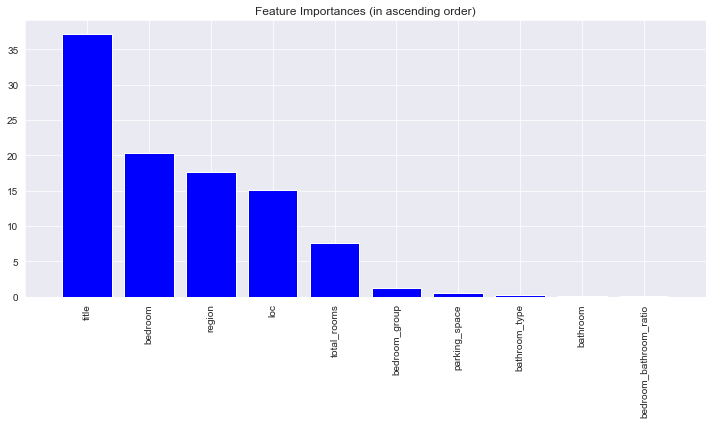

In [345]:
# Get feature importances
importances = best_catboost_model.feature_importances_

# Sort indices by importance score in ascending order
indices = np.argsort(importances)

# Reverse the order to get descending order
indices = indices[::-1]

# Print feature ranking
print("Feature ranking (in ascending order):")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature '{X_train.columns[indices[f]]}' with importance {importances[indices[f]]:.4f}")

# Plot feature importances in ascending order
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (in ascending order)")
plt.bar(range(X_train.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [192]:
# Once your model is trained and tuned, you can make predictions on X_test_scaled for final evaluation
y_test_pred =  best_catboost_model.predict(test)

# For submission, create a DataFrame using the sample_submission's "id" column and the model's predictions
submission_df = pd.DataFrame({
    "ID": sample.ID,
    "price": y_test_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv("pred4_18.csv", index=False)